
# Вебинар 11. API и анализ данных
## Проверка связи
Если у вас нет звука:
*   убедитесь, что на вашем устройстве и в колонках включён звук
*   обновите страницу вебинара или закройте страницу и заново присоединитесь к вебинару
*   откройте вебинар в другом браузере
*   перезагрузите ваше устройство и попытайтесь войти снова
Поставьте в чат:
* «+» — если видно и слышно
* «–» — если нет
## О спикере
**Погудина Дарья**
- эксперт-разработчик на Python в области информационной безопасности и в финтехе
- сертифицированный специалист по базам данных
- более 8 лет опыта разработки, из них более 4 лет — на Python
- 3 года в сфере информационной безопасности с разработкой ПО на Python

## Правила участия
*   Приготовьте блокнот и ручку, чтобы записывать важные мысли и идеи
*   Продолжительность вебинара — 1 час 20 минут
*   Вы можете писать свои вопросы в чате или задавать их вслух
*   Запись вебинара будет доступна в личном кабинете

# Цели занятия

- Разобрать на практике популярные сервисы API в информационной безопасности
- Рассмотреть особенности анализа данных на Python
- Разобрать на практике инструменты для визуализации данных
- Выяснить, какие задачи ИБ решаются статистическими методами

# План занятия
1. Применение API в информационной безопасности
2. Анализ и обработка данных в ИБ с помощью Python
3. Статистические методы анализа в ИБ


# **1. Применение API в информационной безопасности**

## **Что такое Threat intelligence (TI)**

**Threat intelligence (TI)** — это структурированная информация об угрозах информационной безопасности, которая помогает организациям понимать, предсказывать и защищаться от кибератак.

### Основные типы данных Threat Intelligence:

1. **Индикаторы компрометации (IoC — indicators of compromise)**:
   - IP-адреса злоумышленников и ботнетов.
   - Домены фишинга и вредоносного ПО.
   - Хеши вредоносных файлов (MD5, SHA1, SHA256).
   - URL-адреса командных серверов (C2).
   - Email-адреса, используемые в фишинговых атаках.

2. **Тактики, техники и процедуры (TTP — tactics, techniques, procedures)**:
   - методы атак, используемые злоумышленниками;
   - инструменты и вредоносное ПО;
   - поведенческие паттерны атакующих групп.

3. **Контекстная информация**:
   - географическое расположение угроз;
   - история активности IP-адресов;
   - репутация доменов и файлов.

### Для чего используется Threat intelligence

- **Проактивная защита**: блокировка известных вредоносных IP и доменов до того, как они атакуют.
- **Обогащение логов**: добавление контекста к событиям безопасности для лучшего понимания угроз.
- **Приоритизация инцидентов**: определение критичности событий на основе данных о репутации.
- **Расследование инцидентов**: поиск связей между различными событиями и атаками.
- **Автоматизация**: интеграция с системами безопасности для автоматического реагирования.

### Как использовать Threat intelligence

1. **Получение данных через API**: подключение к сервисам Threat intelligence через их API.
2. **Обогащение логов**: добавление информации о репутации IP, доменов, файлов к существующим логам.
3. **Анализ и фильтрация**: использование полученных данных для выявления подозрительной активности.
4. **Принятие решений**: использование данных TI для принятия решений о блокировке или дальнейшем расследовании.

## **Популярные сервисы API**

Ключевые API, которые могут быть полезны для аналитиков ИБ:

1. **VirusTotal API** — сигнатурный анализ файлов и URL, проверка репутации.
2. **Shodan API** — анализ публично доступных сервисов и устройств в интернете.
3. **SecurityTrails API** — анализ DNS-имён, история доменов и IP-адресов.
4. **Vulners API** — анализ уязвимостей, поиск CVE по программному обеспечению.
5. **AbuseIPDB API** — проверка репутации IP-адресов, отчеты о злоупотреблениях.

## **Internal API**

API-инструменты внутри защищаемой инфраструктуры:

1. **OpenDXL** — автоматизация и интеграция для продуктов безопасности (McAfee, Symantec и др.).
2. **Cuckoo Sandbox** — автоматический анализ вредоносных файлов в изолированной среде.
3. **TheHive** — платформа для управления инцидентами и расследований.


## Демонстрация работы с Threat intelligence API

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.ensemble import IsolationForest
import os
from dotenv import load_dotenv

# Загрузка переменных окружения из .env файла
load_dotenv()

# Проверка наличия API ключа
SHODAN_API_KEY = os.getenv('SHODAN_API_KEY')

## Демонстрация работы с Shodan API

Shodan — это поисковая система для интернет-соединённых устройств. Shodan помогает находить:
- открытые порты и сервисы;
- версии программного обеспечения;
- географическое расположение устройств;
- уязвимости и небезопасные конфигурации.

### Примеры использования Shodan в ИБ:
- поиск уязвимых устройств в вашей инфраструктуре;
- анализ открытых портов и сервисов;
- мониторинг экспозиции ваших IP-адресов в интернете;
- поиск устройств с небезопасными конфигурациями.


In [2]:
pip install shodan

Note: you may need to restart the kernel to use updated packages.


In [3]:
import shodan

In [4]:
api = None  # Инициализируем переменную

if SHODAN_API_KEY:
    try:
        api = shodan.Shodan(SHODAN_API_KEY)

        # Проверка информации об аккаунте
        info = api.info()
        print("Информация об аккаунте Shodan:")
        print(f"  План: {info.get('plan', 'N/A')}")
        print(f"  Доступно запросов: {info.get('query_credits', 'N/A')}")
        print(f"  Доступно сканирований: {info.get('scan_credits', 'N/A')}")
        print("Подключение к Shodan API успешно")
    except Exception as e:
        print(f"Ошибка при инициализации Shodan API: {e}")
        api = None
else:
    print("API ключ не найден.")


Информация об аккаунте Shodan:
  План: dev
  Доступно запросов: 97
  Доступно сканирований: 100
Подключение к Shodan API успешно


### Пример 1. Поиск информации об IP-адресе

Shodan может предоставить информацию о любом IP-адресе в интернете:
- открытые порты и сервисы;
- версии программного обеспечения;
- географическое расположение;
- организация-владелец.


In [5]:
# Пример: Поиск информации об IP-адресе
if api:
    # Можно использовать любой публичный IP-адрес
    # В данном примере используем Google DNS
    target_ip = "8.8.8.8"

    try:
        host_info = api.host(target_ip)

        print(f"Информация об IP-адресе {target_ip}:")
        print(f"  Организация: {host_info.get('org', 'N/A')}")
        print(f"  Страна: {host_info.get('country_name', 'N/A')}")
        print(f"  Город: {host_info.get('city', 'N/A')}")
        print(f"  Операционная система: {host_info.get('os', 'N/A')}")
        print(f"Открытые порты: {len(host_info.get('data', []))}")

        # Создаем DataFrame с информацией о портах
        if host_info.get('data'):
            ports_data = []
            for item in host_info['data']:
                ports_data.append({
                    'port': item.get('port'),
                    'service': item.get('product', 'N/A'),
                    'version': item.get('version', 'N/A'),
                    'transport': item.get('transport', 'N/A')
                })

            ports_df = pd.DataFrame(ports_data)
            print("Детали открытых портов:")
            print(ports_df.to_string(index=False))
    except shodan.APIError as e:
        print(f"Ошибка при запросе: {e}")
else:
    print("API не инициализирован. Проверьте наличие API ключа в .env файле")


Информация об IP-адресе 8.8.8.8:
  Организация: Google LLC
  Страна: United States
  Город: Mountain View
  Операционная система: None
Открытые порты: 3
Детали открытых портов:
 port service version transport
   53     N/A     N/A       tcp
   53     N/A     N/A       udp
  443     N/A     N/A       tcp


### Пример 2. Поиск устройств по запросу

Shodan позволяет искать устройства по различным критериям:
- тип сервиса (например, веб-серверы, базы данных);
- версия программного обеспечения;
- географическое расположение;
- организация.


In [6]:
# Пример. Поиск устройств по запросу
if api:
    # Поиск веб-серверов nginx в России (ограничиваем результаты)
    search_query = 'nginx country:RU'

    try:
        results = api.search(search_query, limit=10)  # Ограничиваем 10 результатами

        print(f"Найдено устройств: {results['total']}")
        print(f"Показано результатов: {len(results['matches'])}")
        print("Примеры найденных устройств:")

        devices_data = []
        for match in results['matches']:
            devices_data.append({
                'ip': match.get('ip_str', 'N/A'),
                'port': match.get('port', 'N/A'),
                'organization': match.get('org', 'N/A'),
                'location': f"{match.get('location', {}).get('city', 'N/A')}, {match.get('location', {}).get('country_name', 'N/A')}",
                'product': match.get('product', 'N/A'),
                'version': match.get('version', 'N/A')
            })

        devices_df = pd.DataFrame(devices_data)
        print(devices_df.to_string(index=False))

    except shodan.APIError as e:
        print(f"Ошибка при поиске: {e}")
else:
    print("API не инициализирован. Проверьте наличие API ключа в .env файле")


Найдено устройств: 1347036
Показано результатов: 10
Примеры найденных устройств:
             ip  port                             organization                               location product version
  77.41.250.126  5006 111250 Russia Moscow EDN/SOVINTEL et UD9             Moscow, Russian Federation   nginx     N/A
 185.31.112.222  1883                             CDNVIDEO LLC             Moscow, Russian Federation   nginx     N/A
  134.19.150.82    80  SVYAZ-ENERGO telecommunications company           Kostroma, Russian Federation   nginx     N/A
   89.23.101.19  8181                         Mikhail Tonkonog             Moscow, Russian Federation     N/A     N/A
195.135.239.119    80                               M9 COM LTD             Moscow, Russian Federation   nginx  1.18.0
  45.84.227.236  8070                                Beget LLC   Saint Petersburg, Russian Federation   nginx     N/A
 95.161.179.123    43                               Obit, Ltd.   Saint Petersburg, Russian Fe

### Пример 3. Интеграция Shodan с анализом логов

Теперь объединим данные Shodan с нашими логами безопасности для обогащения Threat intelligence.


In [7]:
# Функция для получения информации об IP из Shodan
def get_shodan_info(ip_address, api_client):
    """Получает информацию об IP-адресе из Shodan"""
    if api_client is None:
        return {
            'ip': ip_address,
            'org': 'Unknown',
            'country': 'Unknown',
            'city': 'Unknown',
            'os': 'Unknown',
            'ports_count': 0,
            'vulns_count': 0
        }

    try:
        host_info = api_client.host(ip_address)
        return {
            'ip': ip_address,
            'org': host_info.get('org', 'Unknown'),
            'country': host_info.get('country_name', 'Unknown'),
            'city': host_info.get('city', 'Unknown'),
            'os': host_info.get('os', 'Unknown'),
            'ports_count': len(host_info.get('data', [])),
            'vulns_count': len(host_info.get('vulns', [])) if host_info.get('vulns') else 0
        }
    except Exception as e:
        # Если IP не найден или ошибка API, возвращаем базовую информацию
        print(f"  Предупреждение для {ip_address}: {str(e)[:50]}")
        return {
            'ip': ip_address,
            'org': 'Unknown',
            'country': 'Unknown',
            'city': 'Unknown',
            'os': 'Unknown',
            'ports_count': 0,
            'vulns_count': 0
        }

# Пример использования с несколькими IP-адресами
if api:
    # Список IP-адресов для проверки
    test_ips = ["8.8.8.8", "1.1.1.1", "208.67.222.222", "185.220.101.1", "45.133.1.2"]

    print("Получение информации из Shodan для IP-адресов:")
    shodan_data = []

    for ip in test_ips:
        print(f"  Проверка {ip}...")
        info = get_shodan_info(ip, api)
        shodan_data.append(info)

    # Создаём DataFrame с данными Shodan
    shodan_df = pd.DataFrame(shodan_data)
    print("Данные из Shodan:")
    print(shodan_df.to_string(index=False))

    # Сохраняем для дальнейшего использования
    ti_data_shodan = shodan_df.copy()
else:
    print("API не инициализирован. Используем mock данные")
    # Создаем mock-данные для демонстрации
    ti_data_shodan = pd.DataFrame({
        'ip': ["8.8.8.8", "185.220.101.1", "45.133.1.2"],
        'org': ['Google LLC', 'Unknown', 'Unknown'],
        'country': ['United States', 'Germany', 'Russia'],
        'city': ['Mountain View', 'Unknown', 'Unknown'],
        'os': ['Unknown', 'Unknown', 'Unknown'],
        'ports_count': [0, 0, 0],
        'vulns_count': [0, 0, 0]
    })


Получение информации из Shodan для IP-адресов:
  Проверка 8.8.8.8...
  Проверка 1.1.1.1...
  Проверка 208.67.222.222...
  Проверка 185.220.101.1...
  Проверка 45.133.1.2...
Данные из Shodan:
            ip                                       org       country          city   os  ports_count  vulns_count
       8.8.8.8                                Google LLC United States Mountain View None            3            0
       1.1.1.1 APNIC and Cloudflare DNS Resolver project     Australia      Brisbane None           15            0
208.67.222.222                        Cisco OpenDNS, LLC United States   Wright City None            6            0
 185.220.101.1                            Artikel10 e.V.       Germany        Berlin None            4            0
    45.133.1.2           Turien en Co. Assuradeuren B.V.   Netherlands       Alkmaar None            1            0


## Ваши вопросы

# **2. Анализ и обработка данных в ИБ с помощью Python**

## Предварительная обработка и очистка данных

Основные задачи предварительной обработки:

1. Устранение шума и лишних данных.
2. Преобразование данных в удобный формат.
3. Обработка пропущенных значений и дубликатов.

## Библиотека pandas

Pandas — библиотека Python для обработки и анализа структурированных данных.

**Особенности pandas:**
- имеет открытый исходный код;
- быстрая и мощная;
- позволяет решать задачи автоматизации сбора и обработки данных.


In [8]:
# Пример грязных данных в формате JSON
# Они могут содержать пропущенные значения, неверные типы данных и даже дубликаты

dirty_data = {
    "logs": [
        {"id": 1, "timestamp": "2023-08-20T08:00:00", "event": "login", "user": None},
        {"id": 2, "timestamp": None, "event": "data_access", "user": "alice"},
        {"id": 3, "timestamp": "2023-08-20T09:00:00", "event": "", "user": "bob"},
        {"id": 4, "timestamp": "2023-08-20T10:00:00", "event": "data_modification", "user": "charlie"},
        {"id": 2, "timestamp": "2023-08-20T08:05:00", "event": "logout", "user": "alice"},
        {"id": 5, "timestamp": "2023-08-20", "event": "data_deletion", "user": "dave"}
    ]
}

# Загрузка данных в DataFrame
df = pd.DataFrame(dirty_data["logs"])
print("Исходные данные:")
print(df)
print("Информация о данных:")
print(df.info())


Исходные данные:
   id            timestamp              event     user
0   1  2023-08-20T08:00:00              login     None
1   2                 None        data_access    alice
2   3  2023-08-20T09:00:00                         bob
3   4  2023-08-20T10:00:00  data_modification  charlie
4   2  2023-08-20T08:05:00             logout    alice
5   5           2023-08-20      data_deletion     dave
Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         6 non-null      int64 
 1   timestamp  5 non-null      object
 2   event      6 non-null      object
 3   user       5 non-null      object
dtypes: int64(1), object(3)
memory usage: 324.0+ bytes
None


In [26]:
# Удаление дубликатов по ID
df_clean = df.drop_duplicates(subset="id", keep="first")
df_clean = df_clean.copy() 

# Обработка пропущенных значений
df_clean["user"] = df_clean["user"].fillna("unknown")
df_clean["event"] = df_clean["event"].replace("", "logout")  # Замена пустых строк

# Преобразование timestamp в правильный формат
df_clean["timestamp"] = pd.to_datetime(df_clean["timestamp"], errors="coerce")

# Удаление строк с некорректными timestamp
df_clean = df_clean.dropna(subset=["timestamp"])

# Сброс индекса
df_clean = df_clean.reset_index(drop=True)

print("Очищенные данные:")
print(df_clean)
print("Информация о очищенных данных:")
print(df_clean.info())


Очищенные данные:
   id           timestamp              event     user
0   1 2023-08-20 08:00:00              login  unknown
1   3 2023-08-20 09:00:00             logout      bob
2   4 2023-08-20 10:00:00  data_modification  charlie
Информация о очищенных данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   id         3 non-null      int64         
 1   timestamp  3 non-null      datetime64[ns]
 2   event      3 non-null      object        
 3   user       3 non-null      object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 228.0+ bytes
None



## Загрузка и обработка логов безопасности с обогащением Threat intelligence

Теперь рассмотрим работу с более реалистичными логами безопасности и их обогащение данными Threat intelligence из Shodan.

**Процесс обогащения логов:**
1. Загружаем логи безопасности (IP-адреса источников запросов).
2. Извлекаем уникальные IP-адреса из логов.
3. Используем Shodan API для получения информации о каждом IP (организация, страна, открытые порты, уязвимости).
4. Объединяем данные логов с данными из Shodan.
5. Рассчитываем метрики риска на основе данных Shodan (количество уязвимостей, открытых портов).
6. Используем обогащённые данные для анализа и выявления угроз.


In [10]:
# Синтетические логи безопасности
# В реальности эти логи получаются из систем мониторинга (SIEM, файрволы, IDS/IPS)

# Создаем список IP-адресов для логов
# Используем IP-адреса, которые мы уже проверили в Shodan (если есть данные)
# Или используем публичные IP-адреса для демонстрации
if 'ti_data_shodan' in locals() and len(ti_data_shodan) > 0:
    available_ips = ti_data_shodan["ip"].tolist()
    print(f"Используем IP-адреса из данных Shodan: {available_ips}")
else:
    # Если данных Shodan нет, используем тестовые IP
    available_ips = ["8.8.8.8", "1.1.1.1", "208.67.222.222"]
    print(f"Используем тестовые IP-адреса: {available_ips}")

# Создаем логи с IP-адресами источников
logs = pd.DataFrame({
    "timestamp": pd.date_range("2024-01-01", periods=200, freq="h"),
    "requests": np.random.poisson(20, 200),
    "failed_logins": np.random.poisson(2, 200),
    "source_ip": np.random.choice(available_ips, 200)  # IP-адреса источников запросов
})

print("Исходные логи безопасности (до обогащения):")
print(logs.head(10))
print(f"Всего записей: {len(logs)}")
print(f"Уникальных IP-адресов: {logs['source_ip'].nunique()}")
print(f"Распределение запросов по IP-адресам:")
print(logs['source_ip'].value_counts())


Используем IP-адреса из данных Shodan: ['8.8.8.8', '1.1.1.1', '208.67.222.222', '185.220.101.1', '45.133.1.2']
Исходные логи безопасности (до обогащения):
            timestamp  requests  failed_logins       source_ip
0 2024-01-01 00:00:00        23              2  208.67.222.222
1 2024-01-01 01:00:00        14              5  208.67.222.222
2 2024-01-01 02:00:00        29              1         8.8.8.8
3 2024-01-01 03:00:00        19              2  208.67.222.222
4 2024-01-01 04:00:00        18              0   185.220.101.1
5 2024-01-01 05:00:00        16              2         8.8.8.8
6 2024-01-01 06:00:00        22              3         1.1.1.1
7 2024-01-01 07:00:00        17              2         8.8.8.8
8 2024-01-01 08:00:00        13              2  208.67.222.222
9 2024-01-01 09:00:00        22              2         1.1.1.1
Всего записей: 200
Уникальных IP-адресов: 5
Распределение запросов по IP-адресам:
source_ip
208.67.222.222    53
45.133.1.2        43
8.8.8.8           

In [11]:
# Обогащение логов данными Threat intelligence из Shodan

# Получаем уникальные IP-адреса из логов
unique_ips = logs['source_ip'].unique()
print(f"Обнаружено {len(unique_ips)} уникальных IP-адресов в логах")

# Получаем данные из Shodan для каждого уникального IP
shodan_data = []
for ip in unique_ips:
    print(f"Запрос данных для {ip}...")
    info = get_shodan_info(ip, api)
    shodan_data.append(info)

# Создаём DataFrame с данными Shodan
shodan_enrichment_df = pd.DataFrame(shodan_data)
print("Данные из Shodan:")
print(shodan_enrichment_df)

# Рассчитываем метрики риска
shodan_enrichment_df['malicious_score'] = (
    shodan_enrichment_df['vulns_count'] * 30 +
    shodan_enrichment_df['ports_count'] * 2
).clip(upper=100)

# Определяем репутацию
def get_reputation(score):
    if score >= 70:
        return 'high_risk'
    elif score >= 40:
        return 'suspicious'
    elif score >= 20:
        return 'moderate'
    else:
        return 'clean'

shodan_enrichment_df['reputation'] = shodan_enrichment_df['malicious_score'].apply(get_reputation)

# Объединяем логи с данными Shodan
logs_enriched = logs.merge(
    shodan_enrichment_df[['ip', 'org', 'country', 'city', 'os', 'ports_count',
                          'vulns_count', 'malicious_score', 'reputation']],
    left_on="source_ip",
    right_on="ip",
    how="left"
)

# Заполняем пропущенные значения
logs_enriched['org'] = logs_enriched['org'].fillna('Unknown')
logs_enriched['country'] = logs_enriched['country'].fillna('Unknown')
logs_enriched['city'] = logs_enriched['city'].fillna('Unknown')
logs_enriched['os'] = logs_enriched['os'].fillna('Unknown')
logs_enriched['ports_count'] = logs_enriched['ports_count'].fillna(0)
logs_enriched['vulns_count'] = logs_enriched['vulns_count'].fillna(0)
logs_enriched['malicious_score'] = logs_enriched['malicious_score'].fillna(0)
logs_enriched['reputation'] = logs_enriched['reputation'].fillna('unknown')

# Удаляем дублирующую колонку ip
logs_enriched = logs_enriched.drop(columns=['ip'])

# Сохраняем обогащённые логи
logs = logs_enriched.copy()
print("Логи успешно обогащены данными из Shodan")

Обнаружено 5 уникальных IP-адресов в логах
Запрос данных для 208.67.222.222...
Запрос данных для 8.8.8.8...
Запрос данных для 185.220.101.1...
Запрос данных для 1.1.1.1...
Запрос данных для 45.133.1.2...
Данные из Shodan:
               ip                                        org        country  \
0  208.67.222.222                         Cisco OpenDNS, LLC  United States   
1         8.8.8.8                                 Google LLC  United States   
2   185.220.101.1                             Artikel10 e.V.        Germany   
3         1.1.1.1  APNIC and Cloudflare DNS Resolver project      Australia   
4      45.133.1.2            Turien en Co. Assuradeuren B.V.    Netherlands   

            city    os  ports_count  vulns_count  
0    Wright City  None            6            0  
1  Mountain View  None            3            0  
2         Berlin  None            4            0  
3       Brisbane  None           15            0  
4        Alkmaar  None            1            0

In [12]:
print("Пример обогащённых логов:")
display_cols = ['timestamp', 'source_ip', 'requests', 'failed_logins',
                'org', 'country', 'ports_count', 'vulns_count',
                'malicious_score', 'reputation']
print(logs[display_cols].head(15))

Пример обогащённых логов:
             timestamp       source_ip  requests  failed_logins  \
0  2024-01-01 00:00:00  208.67.222.222        23              2   
1  2024-01-01 01:00:00  208.67.222.222        14              5   
2  2024-01-01 02:00:00         8.8.8.8        29              1   
3  2024-01-01 03:00:00  208.67.222.222        19              2   
4  2024-01-01 04:00:00   185.220.101.1        18              0   
5  2024-01-01 05:00:00         8.8.8.8        16              2   
6  2024-01-01 06:00:00         1.1.1.1        22              3   
7  2024-01-01 07:00:00         8.8.8.8        17              2   
8  2024-01-01 08:00:00  208.67.222.222        13              2   
9  2024-01-01 09:00:00         1.1.1.1        22              2   
10 2024-01-01 10:00:00         8.8.8.8        22              4   
11 2024-01-01 11:00:00      45.133.1.2        27              2   
12 2024-01-01 12:00:00      45.133.1.2        21              1   
13 2024-01-01 13:00:00   185.220.101

In [13]:
print("СТАТИСТИКА ПО ОБОГАЩЁННЫМ ДАННЫМ")
print("="*80)
print("Распределение по репутации IP-адресов:")
print(logs['reputation'].value_counts())

print("Распределение по странам:")
print(logs['country'].value_counts())

print("Топ-5 IP-адресов по уровню угрозы:")
top_risk = logs.groupby('source_ip').agg({
    'malicious_score': 'first',
    'vulns_count': 'first',
    'ports_count': 'first',
    'org': 'first',
    'country': 'first',
    'requests': 'sum',
    'failed_logins': 'sum'
}).sort_values('malicious_score', ascending=False).head(5)
print(top_risk)

СТАТИСТИКА ПО ОБОГАЩЁННЫМ ДАННЫМ
Распределение по репутации IP-адресов:
reputation
clean       166
moderate     34
Name: count, dtype: int64
Распределение по странам:
country
United States    93
Netherlands      43
Australia        34
Germany          30
Name: count, dtype: int64
Топ-5 IP-адресов по уровню угрозы:
                malicious_score  vulns_count  ports_count  \
source_ip                                                   
1.1.1.1                      30            0           15   
208.67.222.222               12            0            6   
185.220.101.1                 8            0            4   
8.8.8.8                       6            0            3   
45.133.1.2                    2            0            1   

                                                      org        country  \
source_ip                                                                  
1.1.1.1         APNIC and Cloudflare DNS Resolver project      Australia   
208.67.222.222              

In [28]:
print("АНАЛИЗ ВЫСОКОРИСКОВЫХ СОБЫТИЙ")
print("="*80)
high_risk_logs = logs_enriched[logs_enriched['malicious_score'] > 30]
print(f"Записей с высоким уровнем угрозы (malicious_score > 30): {len(high_risk_logs)}")
if len(high_risk_logs) > 0:
    print("Примеры высокорисковых событий:")
    print(high_risk_logs[['timestamp', 'source_ip', 'org', 'country',
                         'vulns_count', 'ports_count', 'malicious_score',
                         'reputation', 'failed_logins']].head(10))

    print("Статистика по высокорисковым IP:")
    high_risk_summary = high_risk_logs.groupby('source_ip').agg({
        'malicious_score': 'first',
        'vulns_count': 'first',
        'ports_count': 'first',
        'org': 'first',
        'country': 'first',
        'failed_logins': 'sum',
        'requests': 'sum'
    }).sort_values('malicious_score', ascending=False)
    print(high_risk_summary)

АНАЛИЗ ВЫСОКОРИСКОВЫХ СОБЫТИЙ
Записей с высоким уровнем угрозы (malicious_score > 30): 0


## Ваши вопросы

# **3. Статистические методы анализа в ИБ**

## Визуализация данных

Визуализация помогает понять структуру данных и выявить закономерности в событиях информационной безопасности.


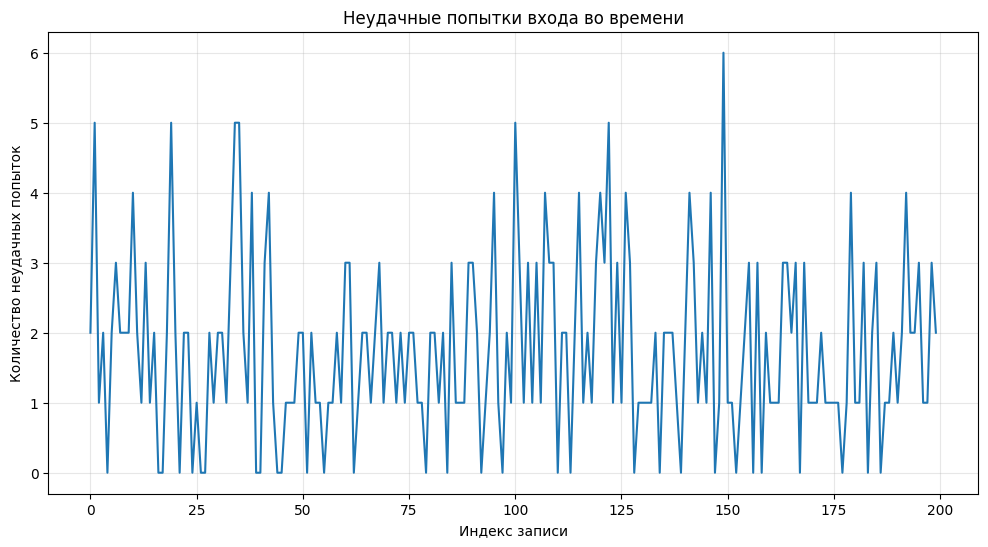

In [15]:
# Визуализация временных рядов
plt.figure(figsize=(12, 6))
sns.lineplot(data=logs, x=logs.index, y="failed_logins")
plt.title("Неудачные попытки входа во времени")
plt.xlabel("Индекс записи")
plt.ylabel("Количество неудачных попыток")
plt.grid(True, alpha=0.3)
plt.show()


In [16]:
# Создание данных для анализа распределения событий
events_data = {
    "events": [
        {"id": 1, "timestamp": "2024-01-01T08:00:00", "signature": "SQL Injection", "severity": "high"},
        {"id": 2, "timestamp": "2024-01-01T09:00:00", "signature": "XSS Attack", "severity": "medium"},
        {"id": 3, "timestamp": "2024-01-01T10:00:00", "signature": "Brute Force", "severity": "high"},
        {"id": 4, "timestamp": "2024-01-01T11:00:00", "signature": "SQL Injection", "severity": "high"},
        {"id": 5, "timestamp": "2024-01-01T12:00:00", "signature": "XSS Attack", "severity": "medium"},
        {"id": 6, "timestamp": "2024-01-01T13:00:00", "signature": "DDoS Attack", "severity": "critical"},
        {"id": 7, "timestamp": "2024-01-01T14:00:00", "signature": "Brute Force", "severity": "high"},
        {"id": 8, "timestamp": "2024-01-01T15:00:00", "signature": "SQL Injection", "severity": "high"},
        {"id": 9, "timestamp": "2024-01-01T16:00:00", "signature": "XSS Attack", "severity": "medium"},
        {"id": 10, "timestamp": "2024-01-01T17:00:00", "signature": "Malware Detection", "severity": "critical"},
    ]
}

events_df = pd.DataFrame(events_data["events"])
print("Данные о событиях информационной безопасности:")
print(events_df)

Данные о событиях информационной безопасности:
   id            timestamp          signature  severity
0   1  2024-01-01T08:00:00      SQL Injection      high
1   2  2024-01-01T09:00:00         XSS Attack    medium
2   3  2024-01-01T10:00:00        Brute Force      high
3   4  2024-01-01T11:00:00      SQL Injection      high
4   5  2024-01-01T12:00:00         XSS Attack    medium
5   6  2024-01-01T13:00:00        DDoS Attack  critical
6   7  2024-01-01T14:00:00        Brute Force      high
7   8  2024-01-01T15:00:00      SQL Injection      high
8   9  2024-01-01T16:00:00         XSS Attack    medium
9  10  2024-01-01T17:00:00  Malware Detection  critical


In [17]:
# Изучение распределения событий по типам (по полю signature)
signature_counts = events_df["signature"].value_counts()
print("Распределение событий по типам:")
print(signature_counts)
print(f"\nВсего типов событий: {len(signature_counts)}")


Распределение событий по типам:
signature
SQL Injection        3
XSS Attack           3
Brute Force          2
DDoS Attack          1
Malware Detection    1
Name: count, dtype: int64

Всего типов событий: 5


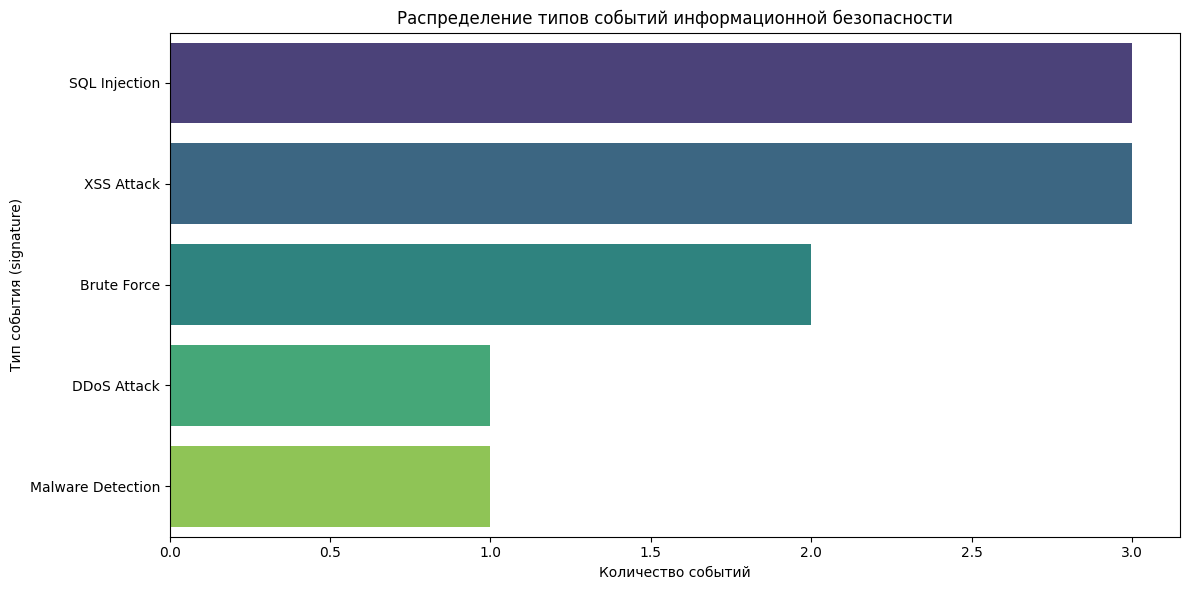

In [29]:
# Построение графика распределения типов событий информационной безопасности
plt.figure(figsize=(12, 6))
sns.countplot(data=events_df, y="signature", hue="signature", order=signature_counts.index, legend=False, palette="viridis")
plt.title("Распределение типов событий информационной безопасности")
plt.xlabel("Количество событий")
plt.ylabel("Тип события (signature)")
plt.tight_layout()
plt.show()


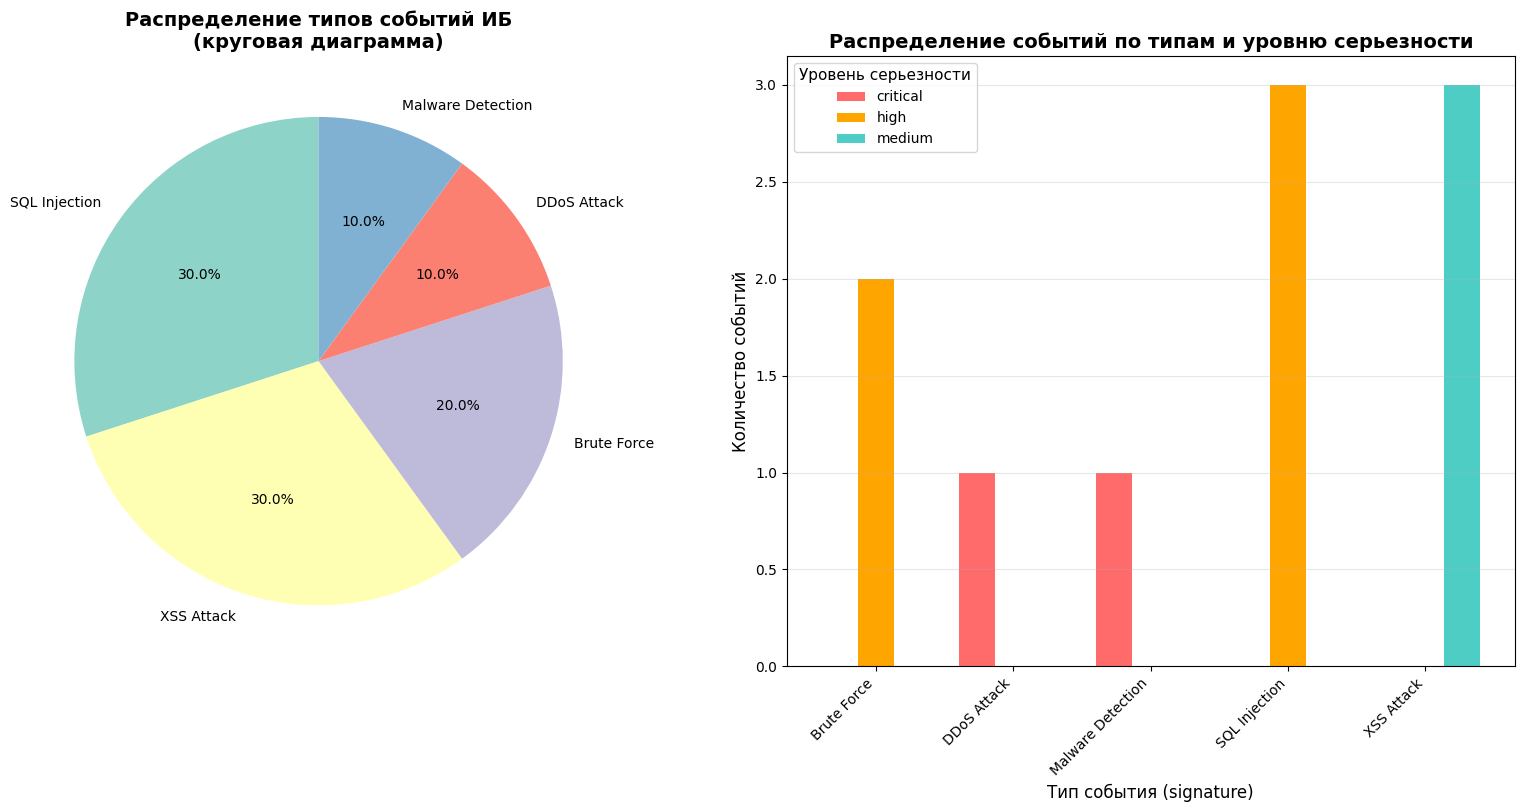

In [19]:
# Альтернативная визуализация: круговая диаграмма с группировкой по уровню серьезности
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Левая диаграмма: круговая диаграмма распределения событий по типам
colors = plt.cm.Set3(range(len(signature_counts)))
wedges, texts, autotexts = ax1.pie(
    signature_counts.values,
    labels=signature_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    textprops={'fontsize': 10}
)
ax1.set_title("Распределение типов событий ИБ\n(круговая диаграмма)", fontsize=14, fontweight='bold')

# Правая диаграмма: группировка по уровню серьезности
severity_counts = events_df.groupby(['signature', 'severity']).size().unstack(fill_value=0)
severity_counts.plot(kind='bar', ax=ax2, color=['#ff6b6b', '#ffa500', '#4ecdc4'], width=0.8)
ax2.set_title("Распределение событий по типам и уровню серьезности", fontsize=14, fontweight='bold')
ax2.set_xlabel("Тип события (signature)", fontsize=12)
ax2.set_ylabel("Количество событий", fontsize=12)
ax2.legend(title="Уровень серьезности", title_fontsize=11, fontsize=10)
ax2.set_xticklabels(severity_counts.index, rotation=45, ha='right')
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## Корреляционный анализ

Корреляционный анализ показывает степень линейной связи между двумя или более переменными. Значения в корреляционной матрице изменяются от -1 до 1.

**Значения корреляции:**
- **1** — полная положительная корреляция: при увеличении одной переменной другая тоже увеличивается;
- **0** — отсутствие корреляции: переменные не связаны между собой;
- **-1** — полная отрицательная корреляция: при увеличении одной переменной другая уменьшается.

**Примеры в ИБ:**
- Положительная корреляция: между объёмом сетевого трафика и числом обнаруженных угроз.
- Отрицательная корреляция: между уровнем обучения персонала и числом успешных фишинговых атак.


In [30]:
# Создание данных для корреляционного анализа
# Пример: данные о времени реакции на инциденты и уровне угрозы
np.random.seed(42)  # Для воспроизводимости результатов

n_samples = 50  # Увеличиваем количество наблюдений для большей реалистичности

# Базовые значения с умеренными корреляциями
base_threat = np.random.uniform(1, 10, n_samples)
base_time = 5 + base_threat * 5 + np.random.normal(0, 8, n_samples)  # Умеренная корреляция с шумом
base_systems = 1 + base_threat * 0.8 + np.random.normal(0, 2, n_samples)  # Корреляция с уровнем угрозы
base_traffic = 5 + base_threat * 4 + np.random.normal(0, 12, n_samples)  # Корреляция с уровнем угрозы

# Ограничиваем значения разумными пределами
base_time = np.clip(base_time, 5, 70)
base_systems = np.clip(base_systems, 1, 15).astype(int)
base_traffic = np.clip(base_traffic, 3, 85)

# Добавляем некоторую корреляцию между временем реакции и количеством систем
base_time = base_time + base_systems * 1.5 + np.random.normal(0, 5, n_samples)
base_time = np.clip(base_time, 5, 70)

security_metrics = pd.DataFrame({
    "Уровень угрозы (1-10)": np.round(base_threat, 1),
    "Время реакции (мин.)": np.round(base_time, 1),
    "Количество затронутых систем": base_systems,
    "Объём сетевого трафика (ГБ)": np.round(base_traffic, 1)
})

print("Данные для корреляционного анализа:")
print(security_metrics.head())
print(f"\nВсего наблюдений: {len(security_metrics)}")

Данные для корреляционного анализа:
   Уровень угрозы (1-10)  Время реакции (мин.)  Количество затронутых систем  \
0                    4.4                  36.5                             4   
1                    9.6                  70.0                            10   
2                    7.6                  50.6                             5   
3                    6.4                  35.8                             5   
4                    2.4                   9.1                             2   

   Объём сетевого трафика (ГБ)  
0                         25.2  
1                         58.9  
2                         16.1  
3                         32.8  
4                         17.7  

Всего наблюдений: 50


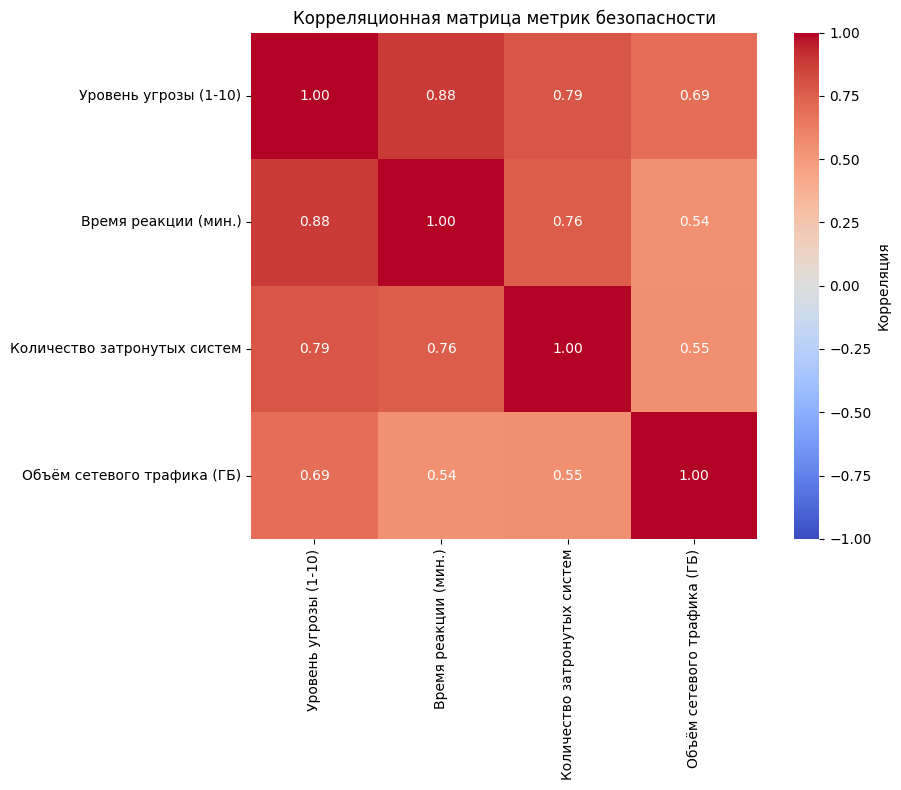

In [31]:
# Построение корреляционной матрицы
correlation_matrix = security_metrics.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1,
            square=True, fmt=".2f", cbar_kws={"label": "Корреляция"})
plt.title("Корреляционная матрица метрик безопасности")
plt.tight_layout()
plt.show()


## Регрессионный анализ

Регрессионный анализ — статистический метод, который позволяет исследовать и моделировать отношения между переменными.

В примере линейная регрессия оценивает отношение между зависимой переменной и одной или несколькими независимыми переменными: между временем реакции и уровнем угрозы.


In [32]:
# Реализация регрессионного анализа с помощью statsmodels
X = security_metrics["Уровень угрозы (1-10)"]
X = sm.add_constant(X)  # Добавляем константу для y-пересечения
y = security_metrics["Время реакции (мин.)"]

model = sm.OLS(y, X).fit()
print(model.summary())


                             OLS Regression Results                             
Dep. Variable:     Время реакции (мин.)   R-squared:                       0.766
Model:                              OLS   Adj. R-squared:                  0.761
Method:                   Least Squares   F-statistic:                     156.8
Date:                  Sun, 25 Jan 2026   Prob (F-statistic):           9.82e-17
Time:                          22:09:00   Log-Likelihood:                -178.40
No. Observations:                    50   AIC:                             360.8
Df Residuals:                        48   BIC:                             364.6
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const     

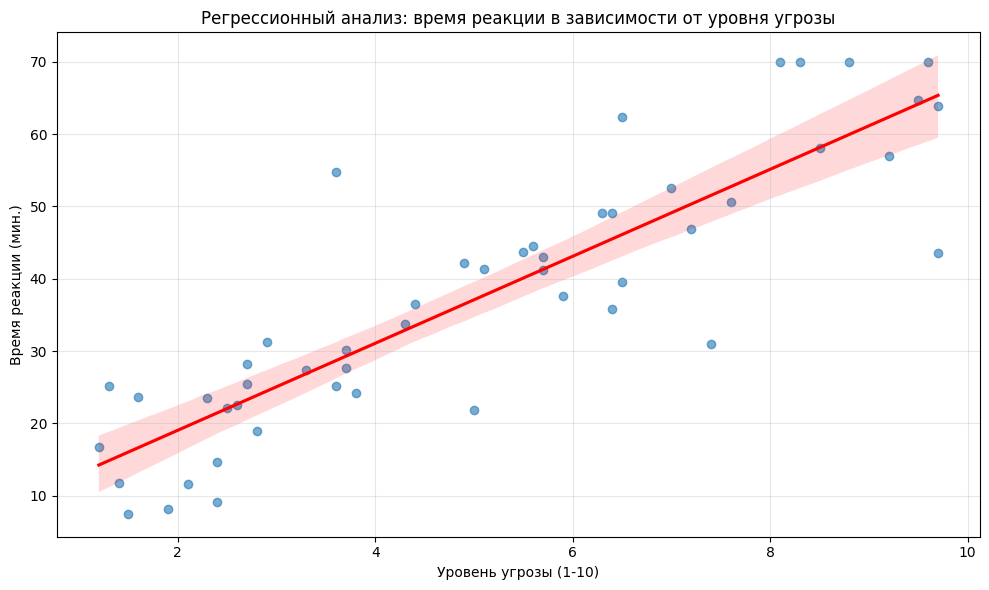

In [33]:
# Визуализация результата регрессионного анализа
plt.figure(figsize=(10, 6))
sns.regplot(data=security_metrics, x="Уровень угрозы (1-10)", y="Время реакции (мин.)",
            scatter_kws={"alpha": 0.6}, line_kws={"color": "red"})
plt.title("Регрессионный анализ: время реакции в зависимости от уровня угрозы")
plt.xlabel("Уровень угрозы (1-10)")
plt.ylabel("Время реакции (мин.)")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


## Зачем в ИБ статистика

### 1. Прогнозирование инцидентов

На основе статистического анализа прошлых данных можно прогнозировать будущие инциденты.

### 2. Оптимизация ресурсов

Понимание наиболее распространённых и вредоносных угроз позволяет лучше распределять ресурсы для противодействия атакам.

### 3. Графическое представление

Визуализация данных помогает быстро понять тренды и закономерности в событиях безопасности.


## ML: Поиск аномалий (Isolation Forest)

Используется для:
- обнаружения brute-force атак;
- DDoS-атак;
- подозрительной активности.


In [34]:
# Используем обогащённые логи для обнаружения аномалий
# В качестве признаков используем: количество запросов, неудачные логины,
# метрики риска из Shodan (количество портов, уязвимостей, malicious_score)

# Выбираем признаки для модели
feature_columns = ["requests", "failed_logins", "malicious_score", "ports_count", "vulns_count"]
features = logs[feature_columns].fillna(0)  # Заполняем пропуски нулями

print("Признаки для модели обнаружения аномалий:")
print(features.describe())

# Создаём модель Isolation Forest
model = IsolationForest(
    n_estimators=200,
    contamination=0.05,  # Ожидаем 5% аномалий
    random_state=42
)

# Обучаем модель и предсказываем аномалии
logs["anomaly"] = model.fit_predict(features)
logs["anomaly"] = logs["anomaly"].map({1: 0, -1: 1})  # 0 = норма, 1 = аномалия

print(f"Обнаружено аномалий: {logs['anomaly'].sum()} из {len(logs)} записей ({logs['anomaly'].sum()/len(logs)*100:.2f}%)")

print("Логи с обнаруженными аномалиями:")
anomaly_cols = ['timestamp', 'source_ip', 'requests', 'failed_logins',
                 'org', 'country', 'malicious_score', 'ports_count',
                 'vulns_count', 'reputation', 'anomaly']
print(logs[logs['anomaly'] == 1][anomaly_cols].head(20))


Признаки для модели обнаружения аномалий:
        requests  failed_logins  malicious_score  ports_count  vulns_count
count  200.00000     200.000000       200.000000   200.000000        200.0
mean    20.17500       1.740000        11.110000     5.555000          0.0
std      4.68338       1.276931         9.263746     4.631873          0.0
min      4.00000       0.000000         2.000000     1.000000          0.0
25%     17.00000       1.000000         6.000000     3.000000          0.0
50%     20.00000       2.000000         8.000000     4.000000          0.0
75%     23.00000       2.000000        12.000000     6.000000          0.0
max     34.00000       6.000000        30.000000    15.000000          0.0
Обнаружено аномалий: 10 из 200 записей (5.00%)
Логи с обнаруженными аномалиями:
              timestamp       source_ip  requests  failed_logins  \
28  2024-01-02 04:00:00      45.133.1.2        34              2   
34  2024-01-02 10:00:00         1.1.1.1        14              5   

## Анализ аномалий


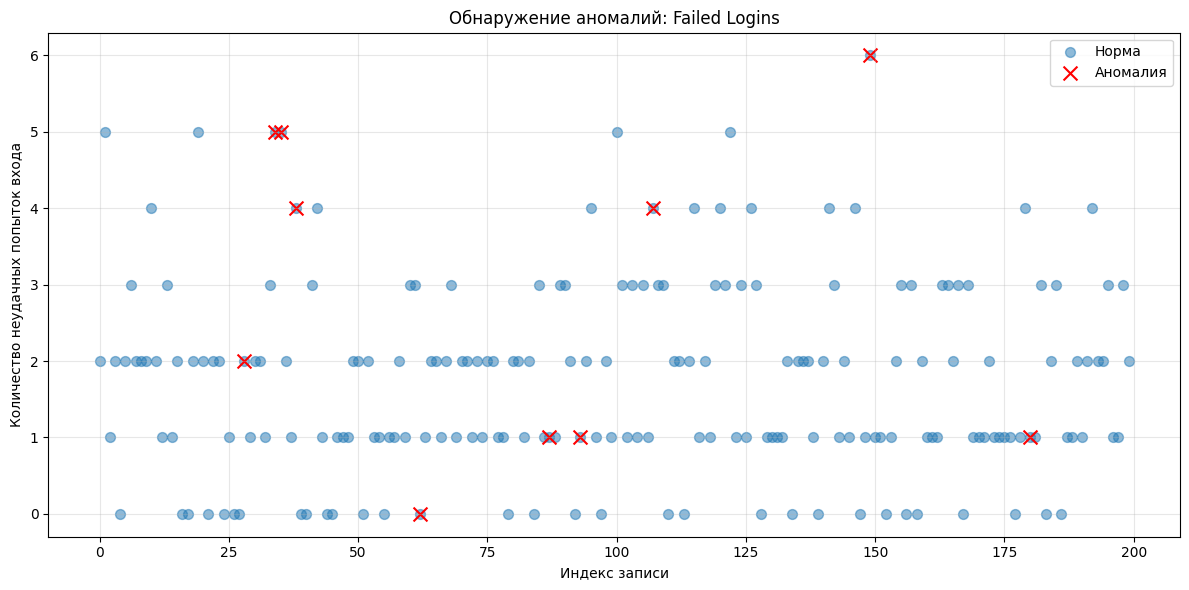

In [35]:
anomalies = logs[logs["anomaly"] == 1]

plt.figure(figsize=(12, 6))
plt.scatter(logs.index, logs["failed_logins"], label="Норма", alpha=0.5, s=50)
plt.scatter(anomalies.index, anomalies["failed_logins"], color="red",
            label="Аномалия", s=100, marker="x")
plt.legend()
plt.title("Обнаружение аномалий: Failed Logins")
plt.xlabel("Индекс записи")
plt.ylabel("Количество неудачных попыток входа")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


## Практическая интерпретация

Аномалии могут означать:
- атаки brute-force;
- компрометацию аккаунтов;
- активность вредоносных IP.


# Выводы

- Изучение статистики на Python и её применение в ИБ позволяют делать обоснованные выводы на основе данных и повышать уровень безопасности информационной системы.

- Библиотека SciPy позволяет проводить анализ и делать выводы на основе статистических данных.

- Библиотека statsmodels позволяет строить прогностические модели, выявлять зависимости и определять аномалии в данных.

- Threat intelligence усиливает аналитику.

- ML позволяет находить неизвестные атаки.

- Python — основной инструмент аналитика ИБ.


## Ваши вопросы

# Итоги занятия

- Разобрали на практике популярные сервисы API в информационной безопасности.
- Рассмотрели особенности анализа данных на Python.
- Разобрали на практике инструменты для визуализации данных.
- Выяснили, какие задачи ИБ решают статистические методы и какие библиотеки Python для этого используются.



# Практическое задание

Цель практического задания — научиться обрабатывать, анализировать и визуализировать данные с использованием библиотек Python.

1. Скачайте файл с набором данных о событиях информационной безопасности в формате JSON (events.json).
2. Загрузите данные из файла JSON в датафрейм с помощью pandas и проанализируйте их. Изучите распределение событий информационной безопасности по типам (по полю signature).
3. Постройте график распределения типов событий информационной безопасности. Используйте seaborn или Matplotlib для создания визуализации.

## Дополнительные задания (опционально)

1. Добавьте новый признак (bytes_sent или response_time).
2. Попробуйте Local Outlier Factor для обнаружения аномалий.
3. Сравните результаты моделей.
4. Опишите SOC-реакцию на найденные аномалии.
